<a href="https://colab.research.google.com/github/climate-and-health-datasci-Unicamp/ldl-cholesterol-climate-analysis/blob/master/notebooks/01_LDL_descriptive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Authors:**
* [Júlia Perassolli De Lázari](https://github.com/juliaplazari)
* [Thiago Ribas Bella](https://github.com/trbella)

*created in jun/2020*

# LDL descriptive

* INPUT: [df_clean.csv](https://github.com/climate-and-health-datasci-Unicamp/data/blob/master/LMC/interim/df_clean.csv) - n = 1,038,281

This script contains:
- basic dispersion measures
- frequency of sexes
- frequency of age groups
- frequency of results, classified as ideal or elevated
- qq-plots
- boxplots

for the LDL dataframe. 




## Load the clean dataframe with LDL results



In [18]:
#@title Libraries and data
#-------------------------------------------------------------------#
#                       Import libraries                            #
#-------------------------------------------------------------------#
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt
#from google.colab import drive
#from google.colab import files
#import matplotlib.patches as mpatches
#from matplotlib.ticker import PercentFormatter



#-------------------------------------------------------------------#
#                      Load clean dataframe                         #
#-------------------------------------------------------------------#

#drive.mount('/content/drive')
url = 'https://media.githubusercontent.com/media/climate-and-health-datasci-Unicamp/data/master/LMC/interim/df_clean.csv'
df_clean = pd.read_csv(url)
print("Lenght of clean dataframe: ",len(df_clean))
df_clean = df_clean.drop(columns = ['Unnamed: 0','Year','Month','Day'])
df_clean = df_clean.rename(columns = {'DateTimeExam':'DATE'})
df_clean.sort_values(by = 'DATE').head(5)


Lenght of clean dataframe:  1038281


,Procedure,DATE,Parameter,Result,Sex,City,UF,Age
412,LDL,2008-03-03,LDLP,98.0,F,CAMPINAS,SAO PAULO,39
333,LDL,2008-03-03,LDLP,143.0,M,CAMPINAS,SAO PAULO,59
491,LDL,2008-03-03,LDLP,179.0,M,CAMPINAS,SAO PAULO,56
492,LDL,2008-03-03,LDLP,166.0,F,CAMPINAS,SAO PAULO,41
493,LDL,2008-03-03,LDLP,178.0,F,CAMPINAS,SAO PAULO,67


## Summary

Get the basic dispersion measures of LDL cholesterol: mean, standart deviation, min, 25%, 50%, 75%, max




           Result
count  1038281.00
mean       124.23
std         38.27
min          1.00
25%         97.00
50%        121.00
75%        148.00
max        846.00


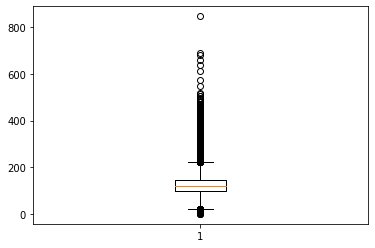

In [19]:
#@title Basic dispersion measures
summary = pd.DataFrame(round(df_clean['Result'].describe(),2))
print(summary)
plt.boxplot(df_clean['Result'])
plt.show()

**Conclusion:** We can observe several outliers in the dataset.

## Frequency of sexes



In [20]:
#@title Get the percentage of each sex. For this analysis, the rows with sex as 'I' were discarded.

#drop the rows with sex as 'I'
sex = df_clean[df_clean['Sex']!='I']
ni = len(df_clean[df_clean['Sex']=='I'])
npe = round(len(df_clean[df_clean['Sex']=='I'])/len(df_clean),2)
print(f"There're {ni}({npe}%) rows with sex as I")

#get the absolute value of sex as 'M' and 'F its percent
#   percent from the dataframe without the rows with sex as 'I
sex = pd.DataFrame(sex['Sex'].value_counts())
sex = sex.reset_index()
sex['Percent'] = sex['Sex']/sex['Sex'].sum()*100
sex['Percent'] = round(sex['Percent'],2)
sex = sex.rename(columns = {'Sex':'n','index':'Sex'})
sex

There're 10395(0.01%) rows with sex as I


,Sex,n,Percent
0,F,590757,57.47
1,M,437129,42.53


**Conclusion:** Women consult physicians more than men.

## Frequency of age groups

Classify each row in a age group, creating a new column ('Age group'). The classifications are:

- **Infant:** less than 2 years old

- **Child:** between 2 and 12 years old

- **Teenager:** between 13 and 19 years old

- **Young adult:** between 20 and 39 years old

- **Adult:** between 40 and 64 years old

- **Elderly:** more than 64 years old

Get the percentage of each age group and a histogram plot

In [21]:
#@title Create age group category
df_clean.loc[df_clean['Age'] < 2.0, 'Age group'] = '1 - Infant'
df_clean.loc[(df_clean['Age'] >=2.0) & (df_clean['Age'] <= 12.0), 'Age group'] = '2 - Child'
df_clean.loc[(df_clean['Age'] >=13.0) & (df_clean['Age'] <= 19.0), 'Age group'] ='3 - Teenager'
df_clean.loc[(df_clean['Age'] >=20.0) & (df_clean['Age'] <= 39.0), 'Age group'] ='4 - Young adult'
df_clean.loc[(df_clean['Age'] >=40.0) & (df_clean['Age'] <= 64.0), 'Age group'] ='5 - Adult'
df_clean.loc[df_clean['Age'] >64.0, 'Age group'] = '6 - Elderly'

             index  Age group  Percent
5       1 - Infant        482     0.05
3        2 - Child      46078     4.44
4     3 - Teenager      45888     4.42
2  4 - Young adult     181974    17.53
0        5 - Adult     520128    50.10
1      6 - Elderly     243731    23.47


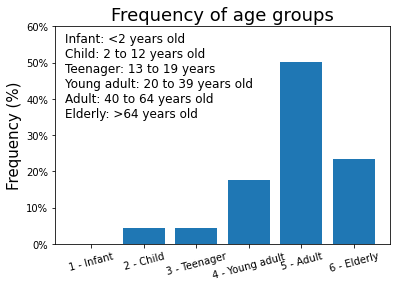

In [22]:
#@title Plot age group frequency 
faixa = pd.DataFrame(df_clean['Age group'].value_counts())
faixa = faixa.reset_index()
faixa = faixa.sort_values(by=['index'])
faixa['Percent'] = faixa['Age group']/faixa['Age group'].sum()*100
faixa['Percent'] = round(faixa['Percent'],2)
print(faixa)

#plot
plt.bar(faixa['index'],faixa['Percent'])
plt.xlabel('')
plt.ylabel('Frequency (%)',fontsize = 15)
plt.ylim(0,60)
plt.title('Frequency of age groups',fontsize = 18)
plt.text(-0.5,35,'Infant: <2 years old \nChild: 2 to 12 years old \nTeenager: 13 to 19 years \nYoung adult: 20 to 39 years old\nAdult: 40 to 64 years old\nElderly: >64 years old', fontsize = 12)
plt.xticks(rotation=15)
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

**Conclusion:** Far more adults took cholesterol exam than other age groups. This high number could be explained by the wide age range (40-64) for this age group. However, this age categorization is widely used by the physicians.

## Exam results

Get the frequency of results in percentage and classify the values as ideal ('ideal') or elevated ('elevado').

The reference values are from [Brazilian guideline on dyslipidemia](http://publicacoes.cardiol.br/2014/diretrizes/2017/02_DIRETRIZ_DE_DISLIPIDEMIAS.pdf):
- younger than 20 years old:  desirable values is less than 110 mg/dL

- older than 20 years old: desirable values is less than 130 mg/dL


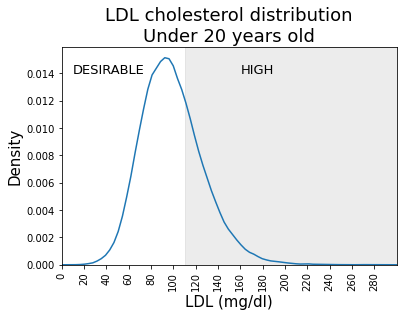

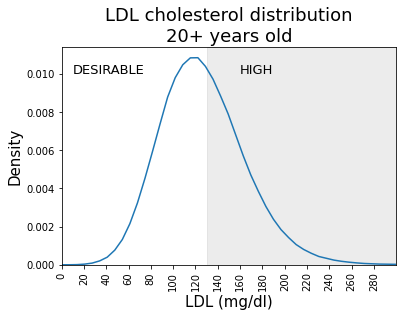

In [23]:
#@title LDL cholesterol distribution
#Lower than 20 years old
lower_20 = df_clean[df_clean['Age'] <= 20]
bins = np.linspace(0, 300, 50)
sns.distplot(lower_20['Result'],bins=bins,hist=False)
plt.xlabel('LDL (mg/dl)',fontsize =15)
plt.ylabel('Density',fontsize =15)
plt.title('LDL cholesterol distribution\nUnder 20 years old',fontsize =18)
plt.text(10,0.014,'DESIRABLE',fontsize = 13) # text
plt.text(160,0.014,'HIGH',fontsize = 13)
plt.xlim(30,300)
x = pd.Series(range(0,300,1))
plt.xticks(x[::20],rotation=90,fontsize = 10)
plt.yticks(fontsize = 10)
plt.axvspan(xmin=110.1, xmax=300,alpha = 0.15,color ='gray')
plt.show()

#Higher than 20 years old
higher_20 = df_clean[df_clean['Age'] >= 20]
sns.distplot(higher_20['Result'],bins=bins,hist=False)
plt.xlabel('LDL (mg/dl)',fontsize =15)
plt.ylabel('Density',fontsize =15)
plt.title('LDL cholesterol distribution\n20+ years old',fontsize =18)
plt.text(10,0.01,'DESIRABLE',fontsize = 13) # text
plt.text(160,0.01,'HIGH',fontsize = 13)
plt.xlim(30,300)
x = pd.Series(range(0,300,1))
plt.xticks(x[::20],rotation=90,fontsize = 10)
plt.yticks(fontsize = 10)
plt.axvspan(xmin=130.1, xmax=300,alpha = 0.15,color ='gray')
plt.show()

**Conclusion:** It looks like, at least for the 20+ years group, that ldl cholesterol follows a normal distribution, with little less than half the population with high levels of this biomarker.

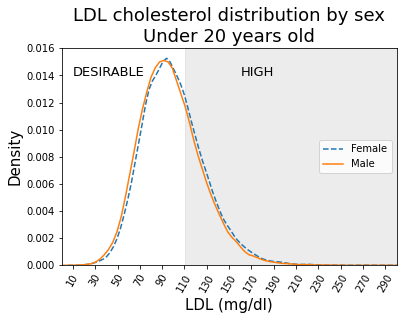

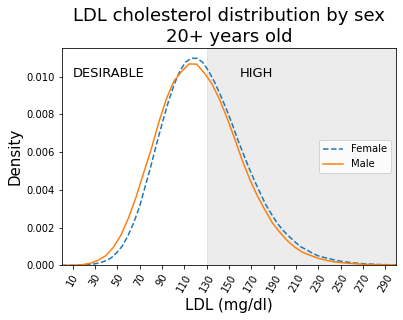

In [24]:
#@title LDL cholesterol distribution by sex

#Lower than 20 years old
bins = np.linspace(0, 300, 50)
ax1 = sns.distplot(lower_20['Result'][lower_20['Sex']=="F"],hist=False,bins=bins, label='Female')
[line.set_linestyle("--") for line in ax1.lines]
ax2 = sns.distplot(lower_20['Result'][lower_20['Sex']=="M"],hist=False,bins=bins, label='Male')
plt.legend(loc = 'center right')
plt.xlabel('LDL (mg/dl)',fontsize =15)
plt.ylabel('Density',fontsize =15)
plt.title('LDL cholesterol distribution by sex\nUnder 20 years old',fontsize =18)
plt.text(10,0.014,'DESIRABLE',fontsize = 13) # text
plt.text(160,0.014,'HIGH',fontsize = 13)
plt.xlim(0,300)
x = pd.Series(range(10,300,1))
plt.xticks(x[::20],rotation=60)
plt.axvspan(xmin=110.1, xmax=300,alpha = 0.15,color ='gray')
plt.show()

#Lower than 20 years old
ax1 = sns.distplot(higher_20['Result'][higher_20['Sex']=="F"],hist=False,bins=bins, label='Female')
[line.set_linestyle("--") for line in ax1.lines]
ax2 = sns.distplot(higher_20['Result'][higher_20['Sex']=="M"],hist=False,bins=bins, label='Male')
plt.xlabel('LDL (mg/dl)',fontsize =15)
plt.ylabel('Density',fontsize =15)
plt.title('LDL cholesterol distribution by sex\n20+ years old',fontsize =18)
plt.text(10,0.01,'DESIRABLE',fontsize = 13) # text
plt.text(160,0.01,'HIGH',fontsize = 13)
plt.xlim(0,300)
plt.legend(loc = 'center right')
x = pd.Series(range(10,300,1))
plt.xticks(x[::20],rotation=60)
plt.axvspan(xmin=130.1, xmax=300,alpha = 0.15,color ='gray')
plt.show()

**Conclusion:** Both sexes distribution doesn't look to have significative different levels of cholesterol.

## QQ-Plot for normality check

A Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.

##### [QQ-Plot examples](http://www.ucd.ie/ecomodel/Resources/QQplots_WebVersion.html) for interpretation

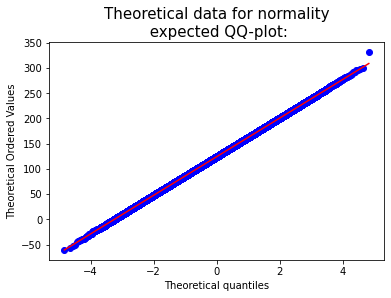

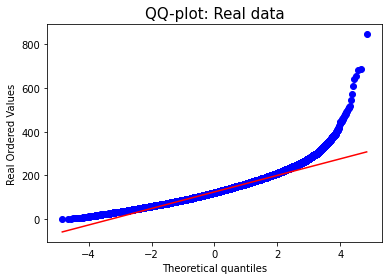

In [25]:
#@title QQ-plots: Theoretical Normal vs Real Data 

#mean and std
loc, scale = stats.norm.fit(df_clean['Result'])
#print(loc,scale)

#generates a normal curve with mean and std obtained above
# how it would be a normal distribution with the parameters of the dataframe used
normal = stats.norm.rvs(loc=loc, scale=scale, size=(len(df_clean['Result']))) 

#qqplot theoretical normal 
stats.probplot(normal, dist="norm", plot=pylab)
pylab.title('Theoretical data for normality\n expected QQ-plot:',fontsize = 15)
plt.ylabel('Theoretical Ordered Values')
pylab.show()

#qqplot real data
stats.probplot(df_clean['Result'], dist="norm", plot=pylab)
pylab.title('QQ-plot: Real data',fontsize = 15)
plt.ylabel('Real Ordered Values')
pylab.show()

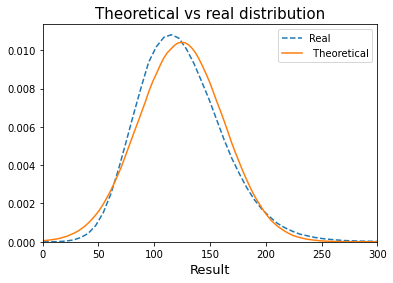

In [26]:
#@title Distributions: Theoretical Normal vs Real Data
#plot the theoretical normal and the real data
ax1 = sns.distplot(df_clean['Result'],bins = bins,hist=False,label = 'Real')
[line.set_linestyle("--") for line in ax1.lines]
ax2 = sns.distplot(normal,bins = bins,hist=False, label = ' Theoretical')
plt.title('Theoretical vs real distribution', fontsize = 15)
plt.xlabel("Result",fontsize = 13)
plt.xlim(0,300)
plt.legend()
plt.show()

**Conclusion:** Without stratification, the graphs show the data differs slightly from normality. Because of our large sample size (n = 1,038,281) the graph approach is better than conventional normality tests.

## Boxplots of LDL cholesterol distribution
Boxplot is a method for graphically depicting groups of numerical data through their quartiles.

The distribution of results per year and per age group was analysed using boxplots


After removing the 5% and 95% extremes we have 936511 rows


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


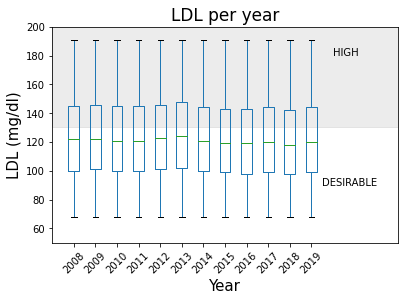

In [27]:
#@title By Year
#-------------------------------------------------------------------#
#                     Boxplot of results per year                   #
#-------------------------------------------------------------------#

#remove data from extremes 5% and 95%
df_clean2 = df_clean[(df_clean['Result']<=df_clean['Result'].quantile(.95))&(df_clean['Result']>=df_clean['Result'].quantile(.05))]
print("After removing the 5% and 95% extremes we have",len(df_clean2),"rows")
df_clean2['DATE'] = pd.to_datetime(df_clean2['DATE'])
ax=df_clean2.boxplot(by=df_clean2['DATE'].dt.year,column=['Result'],rot=45,grid=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.axhspan(ymin=130.1, ymax=df_clean['Result'].max()+100,alpha = 0.15,color ='gray')
plt.xlim(0, 16)
plt.ylim(50, 200)
plt.text(13,180,'HIGH')
plt.text(12.5,90,'DESIRABLE')
plt.title("LDL per year", fontsize = 17)
plt.suptitle("")
ax.set_xlabel("Year", fontsize = 15)
ax.set_ylabel("LDL (mg/dl)", fontsize = 15)
plt.show()

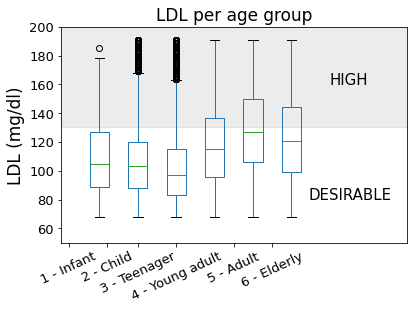

In [28]:
#@title By Age Group
#-------------------------------------------------------------------#
#                Boxplot of results per age group                   #
#-------------------------------------------------------------------#

ax = df_clean2.boxplot(by='Age group',column=['Result'],rot=45,grid=False)
plt.axhspan(ymin=130.1, ymax=200,alpha = 0.15,color ='gray')
plt.xlim(0, 9)
plt.ylim(50, 200)
plt.text(7,160,'HIGH',fontsize = 15)
plt.text(6.45,80,'DESIRABLE',fontsize = 15)
plt.title("LDL per age group",fontsize = 17)
plt.suptitle("")
plt.xlabel('')
plt.yticks(fontsize = 13)
ticks = (0.2,1.2,2,3,4.5,5.5)
plt.xticks(ticks,fontsize = 13,rotation = 25)
ax.set_ylabel("LDL (mg/dl)",fontsize = 17)
plt.show()

**Conclusion:** There is no visual significant difference for ldl cholesterol between the years, but for age group we observe Elderly and Adults with higher levels of this molecule.